<center> <h2> DS 3000 - Fall 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h1> Using Spotify User Activity to make Song Recommendations </h1> </center>
<center><h4>Caterina Wang and Grace Brown</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

In this project, we used a dataset containing a certain user's liked songs and disliked songs from playlists on their Spotify account. From there, we analyzed key features of this dataset in order to train our different machine learning models to recognize songs this user would like, and dislike. After we trained those models, we found the model that yielded the highest accuracy and then used it on another dataset of newly-released music in order to recommend the user a subset of those new songs to listen to.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

The topic of our project is about creating new song recommendations for music listeners using the features of songs they've expressed that they like or dislike. It is important to tackle this problem in our project because there are many ways that users can look for new music, but it does take time for a music listener to look up different artists, and we want to alleviate the amount of time it takes for a music listener to find new music they enjoy. Therefore, we feel this way of recommending music can be run on any set of songs. We want to learn about how song recommendations are made, and if recommending songs based on song attributes of music a user likes is an accurate measure for song recommendation. We plan to compare different supervised machine learning algorithms to make these song recommendations and see which ones are the most accurate.

Significance of the Problem

It is important to tackle this problem because all people have a personal connection with music, and their own music preferences. For music listeners looking for new songs they'll enjoy, it takes a good deal of research and looking artists up, which can take a pretty great deal of time. I think the insights from this project could be useful in looking at the way we recommend new music to people. After looking into how Spotify currently recommends users music specifically for their "Discover Weekly" playlist, there are 3 different ways they currently recommend music to users: Collaborative Filtering, NLP models, and Audio models. Collaborative Filtering is actually based off of other people's liked music and playlists, and they look at other people who enjoy similar music to you, and see if they are listening to anything that you are not listening to, and they recommend you those songs you have not yet listened to. NLP models actually analyze the words that people are using to describe artists in blog posts or articles all over the web. Spotify is constantly scraping the web, grouping different artists into similar categories based off of the adjectives used to describe their music. Lastly, Audio models actually analyze raw audio data to find similarities between different songs. They use neural networks to analyze key features of the raw audio, including time signature, key, mode, tempo, and loudness. Our approach is most similar to the third way they recommend music, as we are making our predictions based on the audio features of songs. They look at the raw audio data, however, wheras we are looking at the song features of each song provided by the API. With this approach, we are looking to explore new ways to recommend music and see the accuracy of the results they yield. 

Sources:

Boam, E. (2019, January 14). I Decoded the Spotify Recommendation Algorithm. Here’s What I Found. Retrieved December 6, 2019, from https://medium.com/@ericboam/i-decoded-the-spotify-recommendation-algorithm-heres-what-i-found-4b0f3654035b.

Ciocca, S. (2017, October 10). How Does Spotify Know You So Well? Retrieved December 6, 2019, from https://medium.com/s/story/spotifys-discover-weekly-how-machine-learning-finds-your-new-music-19a41ab76efe.

Pasick, A. (2015, December 21). The magic that makes Spotify’s Discover Weekly playlists so damn good. Retrieved December 6, 2019, from https://qz.com/571007/the-magic-that-makes-spotifys-discover-weekly-playlists-so-damn-good/.

Questions/Hypothesis

Given the problem we are trying to solve, we do not have a hypothesis. However, we are looking into the answers of these questions:
* Can we create effective song recommendation systems by analyzing a few key attributes of a user's liked songs?
* Are the best song recommendations made from the audio model, or are they from one of the other two ways that song recommendations are created?
* Which Machine Learning Algorithm will help us create the most accurate song recommendations?
* Which song attributes have the greatest effect on the likeability of a song?

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

For our dataset, at first we tried to scrape our data from the Spotify Web API, but it proved to be very difficult to extract the song features from our list of tracks, so we then created a dataset based off of the information on Caterina's Spotify account. We created two playlists, one of songs Caterina likes, and one of songs Caterina dislikes. Using http://static.echonest.com/SortYourMusic/ we were able to log into Caterina's Spotify account and obtain the song attributes for all songs in a certain playlist. These attributes included the Energy, BPM, which means Beats per Minute, Danceability, Loudness, Valence,  Acousticness, Length, Popularity, and RND, which means random. Energy is a perceptual measure of intensity and activity, affected by elements such as dynamic range, perceived loudness, timbre, onset rate, and general entopy. Danceability describes how suitable a song is for dancing based on musical elements such as tempo, rhythm, stability, beat strength, and overall regularity. Loudness is measured in decibels. Valence describes the overall positiveness of a song. Acousticness is a confidence measure of whether the song is acoustic or not. We ended up dropping the Length, Popularity, and Random columns as Length represents the length of a song, popularity represents how popular a song is based on how many users listen to the song, and random is just a random number assigned to a song so you can shuffle your playlist around. We felt that these 3 attributes did not help describe what the song actually sounds like at all, which we decided was the most important part of song likeability.

Datasets link: https://github.com/caterinawang/spotify-song-recs


In [190]:
import requests
import pandas as pd
import numpy as np

## DataFrame containing songs to pull recommenations from
df_new_music = pd.read_csv("https://raw.githubusercontent.com/caterinawang/spotify-song-recs/master/New%20Music%20Friday.csv")
## DataFrame containing user's liked (first half) and disliked (second half) songs to make predictions from
df_user_songs = pd.read_csv("https://raw.githubusercontent.com/caterinawang/spotify-song-recs/master/User%20Songs%203.csv")

In [191]:
df_new_music

,Title,Artist,Release Date,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,RND,Unnamed: 12
0,My Oh My (feat. DaBaby),Camila Cabello,12/6/2019,105,49,72,-6,38,2:51,2,42,7518,NaN
1,Adore You,Harry Styles,12/6/2019,99,77,68,-4,57,3:27,2,0,2832,NaN
2,The Box,Roddy Ricch,12/6/2019,117,59,90,-7,64,3:17,10,0,8414,NaN
3,PAID MY DUES,NF,12/3/2019,146,78,81,-4,38,3:32,14,72,8508,NaN
4,Family,The Chainsmokers,12/6/2019,118,61,58,-7,37,3:15,43,41,6039,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,still ain't you (feat. Nea),Steve James,12/6/2019,122,55,76,-10,51,2:14,0,9,3705,NaN
95,Typa Luv,D. Muñoz,12/6/2019,96,49,65,-7,25,2:11,54,0,4045,NaN
96,PSYKENIGHT,Lancey Foux,12/6/2019,140,85,80,-10,65,2:29,5,8,9519,NaN
97,How I'm Leaving,Westside Tut,12/6/2019,150,53,69,-10,34,3:15,12,0,4097,NaN


In [192]:
likes = []
for i in range(0, 51):
    ## targeet variable for liked songs is 1
    likes.append(1)
for j in range(51, 100):
    #target variable for disliked songs is 0
    likes.append(0)

df_user_songs['target'] = likes
df_user_songs

,Title,Artist,Release Date,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,RND,target
0,Used to Be,AJ Mitchell,5/25/2018,121,47,47,-6,26,2:55,72,75,6856,1
1,Maniac,Conan Gray,10/25/2019,108,65,62,-5,52,3:06,0,81,1552,1
2,Flames (with ZAYN),R3HAB,11/15/2019,152,64,36,-8,44,2:36,16,55,2807,1
3,Body Back (feat. Maia Wright),Gryffin,10/18/2019,123,83,69,-4,49,3:35,9,76,3476,1
4,Can We Kiss Forever?,Kina,8/31/2018,110,13,49,-19,12,3:08,90,86,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,When the Stars Are Right - Single Edit,Serious Black,12/3/2019,83,97,17,-6,14,3:42,0,9,2996,0
96,The Oracle,Avalanch,2/15/2019,106,98,54,-3,38,4:57,0,33,9886,0
97,"The Earth, the Moon, the Sun",Diviner,5/3/2019,116,97,53,-4,15,5:21,0,31,3658,0
98,Until We Fall,Starkill,8/24/2018,100,98,45,-4,7,3:31,0,33,5562,0


### 2.2. Variables

For our predictive models, our features are the audio attributes of a given song, which are the different columns in our dataset. These include song Energy, Valence, Loudness, Danceability, Beats per Minute, and Acousticness. After feature selection, however, Energy, Valence, and Loudness were chosen as the most important features, so only those will be in fitting the models. Our target variable is song likeability, and the only two possible values for this column are 0 or 1, with 0 representing the song is disliked by the user, and 1 representing the song is liked by the user.


### 2.3. Data Analysis

Our predictive model is going to predict the target variable, which is song likeability, from the key features we determined during Feature Extraction: Energy, Loudness, and Valence. This is a form of supervised machine learning because we are using labeled data in order to classify our data, and then train our model to create predictions based on that data. In terms of Machine Learning Algorithms, we are going to compare 4 different classifiers against each other: Support Vector Machine, k-Nearest Neighbors, Decision Trees, and Random Forest. The first 3 we learned in class, and the last one, Random Forest, is when you create a set of decision trees from a randomly selected subset of the training set, and each individual decision tree spits out a class prediction, and the class with the most votes becomes our class prediction. We decided to test these 3 different classifiers against each other because they all worked pretty well with our dataset, and then we also decided to add the Random Forest Classifier because one of the drawbacks of the Decision Tree Classifier was that you usually need an ensemble of trees for better generalization performance, which increases prediction accuracy, and that is exactly what the Random Forest Classifier does. All of them work well with different types of data and build and train their models relatively quickly.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling


In [193]:
## non useful variables and na values taken out
df_new_music = df_new_music.drop("Length", axis=1)
df_new_music = df_new_music.drop("Pop.", axis=1)
df_new_music = df_new_music.drop("RND", axis=1)
df_new_music = df_new_music.drop("Unnamed: 12", axis=1)
df_new_music = df_new_music.drop("Release Date", axis=1)
df_new_music

,Title,Artist,BPM,Energy,Dance,Loud,Valence,Acoustic
0,My Oh My (feat. DaBaby),Camila Cabello,105,49,72,-6,38,2
1,Adore You,Harry Styles,99,77,68,-4,57,2
2,The Box,Roddy Ricch,117,59,90,-7,64,10
3,PAID MY DUES,NF,146,78,81,-4,38,14
4,Family,The Chainsmokers,118,61,58,-7,37,43
...,...,...,...,...,...,...,...,...
94,still ain't you (feat. Nea),Steve James,122,55,76,-10,51,0
95,Typa Luv,D. Muñoz,96,49,65,-7,25,54
96,PSYKENIGHT,Lancey Foux,140,85,80,-10,65,5
97,How I'm Leaving,Westside Tut,150,53,69,-10,34,12


In [194]:
## non useful variables and na values taken out
df_user_songs = df_user_songs.drop("Length", axis=1)
df_user_songs = df_user_songs.drop("Pop.", axis=1)
df_user_songs = df_user_songs.drop("RND", axis=1)
df_user_songs = df_user_songs.drop("Release Date", axis=1)
df_user_songs

,Title,Artist,BPM,Energy,Dance,Loud,Valence,Acoustic,target
0,Used to Be,AJ Mitchell,121,47,47,-6,26,72,1
1,Maniac,Conan Gray,108,65,62,-5,52,0,1
2,Flames (with ZAYN),R3HAB,152,64,36,-8,44,16,1
3,Body Back (feat. Maia Wright),Gryffin,123,83,69,-4,49,9,1
4,Can We Kiss Forever?,Kina,110,13,49,-19,12,90,1
...,...,...,...,...,...,...,...,...,...
95,When the Stars Are Right - Single Edit,Serious Black,83,97,17,-6,14,0,0
96,The Oracle,Avalanch,106,98,54,-3,38,0,0
97,"The Earth, the Moon, the Sun",Diviner,116,97,53,-4,15,0,0
98,Until We Fall,Starkill,100,98,45,-4,7,0,0


In [195]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## each ML classifier to be trained
knn = KNeighborsClassifier(n_neighbors = 5)
c = DecisionTreeClassifier(min_samples_split=100)
svc_lin = SVC(kernel="linear", C=0.025)
forest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

## features and target extracted from the df_user_songs 
features = df_user_songs.drop("target", axis = 1).drop("Artist", axis = 1).drop("Title", axis = 1)
target = df_user_songs["target"]

## dictionary of classifiers to iterate through
estimators = {"k-Nearest Neighbor" : knn, "Support Vector Machine": svc_lin, 
              "Decision Tree": c, "Random Forest": forest}

## data split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
for classifier in estimators.values():

    ## Feature selection performed to find most important features
    select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)
    select.fit(X_train, y_train)

    X_train_selected = select.transform(X_train)
    X_test_selected = select.transform(X_test)

    index = select.get_support()
    selection_features = []
    
    for i in range(len(features.columns)):
        if index[i] == True:
            selection_features.append(features.columns[i])

    print(list(estimators.keys())[list(estimators.values()).index(classifier)] + ":")
    print("Selected features after RFE:")
    print("\t", "\n\t".join(selection_features))

k-Nearest Neighbor:
Selected features after RFE:
	 Energy
	Loud
	Valence
Support Vector Machine:
Selected features after RFE:
	 Energy
	Loud
	Valence
Decision Tree:
Selected features after RFE:
	 Energy
	Loud
	Valence
Random Forest:
Selected features after RFE:
	 Energy
	Loud
	Valence


### 3.2. Data Exploration

Image links:
https://github.com/caterinawang/spotify-song-recs 


In [196]:
from matplotlib import pyplot as plt
import seaborn as sns

## splits each variable into liked and disliked songs' values to be used in below graphs
pos_bpm = df_user_songs[df_user_songs['target'] == 1]['BPM']
neg_bpm = df_user_songs[df_user_songs['target'] == 0]['BPM']
pos_energy = df_user_songs[df_user_songs['target'] == 1]['Energy']
neg_energy = df_user_songs[df_user_songs['target'] == 0]['Energy']
pos_dance = df_user_songs[df_user_songs['target'] == 1]['Dance']
neg_dance = df_user_songs[df_user_songs['target'] == 0]['Dance']
pos_loud = df_user_songs[df_user_songs['target'] == 1]['Loud']
neg_loud = df_user_songs[df_user_songs['target'] == 0]['Loud']
pos_valence = df_user_songs[df_user_songs['target'] == 1]['Valence']
neg_valence = df_user_songs[df_user_songs['target'] == 0]['Valence']
pos_acoustic = df_user_songs[df_user_songs['target'] == 1]['Acoustic']
neg_acoustic = df_user_songs[df_user_songs['target'] == 0]['Acoustic']

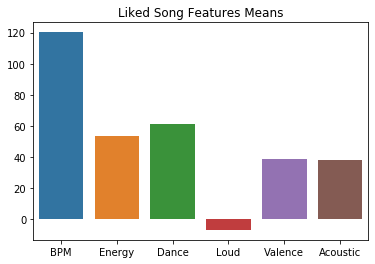

In [197]:
bpm_pos = []
energy_pos = []
dance_pos = []
loud_pos = []
valence_pos = []
acoustic_pos = []

## sums values of each feature if it is a liked song
for index, row in df_user_songs.iterrows():
    if row['target'] == 1:
        bpm_pos.append(row['BPM'])
        energy_pos.append(row['Energy'])
        dance_pos.append(row['Dance'])
        loud_pos.append(row['Loud'])
        valence_pos.append(row['Valence'])
        acoustic_pos.append(row['Acoustic'])
        
## computes means
bpm = np.array(bpm_pos).mean()
energy = np.array(energy_pos).mean()
dance = np.array(dance_pos).mean()
loud = np.array(loud_pos).mean()
valence = np.array(valence_pos).mean()
acoustic = np.array(acoustic_pos).mean()

means = [bpm, energy, dance, loud, valence, acoustic]
titles = ["BPM", "Energy", "Dance", "Loud", "Valence", "Acoustic"]

## creates bar plot
graph = sns.barplot(x=titles, y=means)
graph.set_title("Liked Song Features Means")
graph.figure.savefig("liked_songs_avg")

This bar plot shows the means of each feature (BPM, Engergy, Danceability, Loudness, Valence, and Acousticness) across all of the user's liked songs.

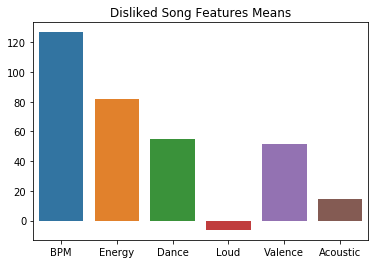

In [198]:
bpm_neg = []
energy_neg = []
dance_neg = []
loud_neg = []
valence_neg = []
acoustic_neg = []

## sums values of each feature if it is a disliked song
for index, row in df_user_songs.iterrows():
    if row['target'] == 0:
        bpm_neg.append(row['BPM'])
        energy_neg.append(row['Energy'])
        dance_neg.append(row['Dance'])
        loud_neg.append(row['Loud'])
        valence_neg.append(row['Valence'])
        acoustic_neg.append(row['Acoustic'])

        
## computes means
bpm = np.array(bpm_neg).mean()
energy = np.array(energy_neg).mean()
dance = np.array(dance_neg).mean()
loud = np.array(loud_neg).mean()
valence = np.array(valence_neg).mean()
acoustic = np.array(acoustic_neg).mean()

means = [bpm, energy, dance, loud, valence, acoustic]
titles = ["BPM", "Energy", "Dance", "Loud", "Valence", "Acoustic"]

## creates bar plot
graph = sns.barplot(x=titles, y=means)
graph.set_title("Disliked Song Features Means")
graph.figure.savefig("disliked_songs_avg")

This bar plot shows the means of each feature (BPM, Engergy, Danceability, Loudness, Valence, and Acousticness) across all of the user's disliked songs.

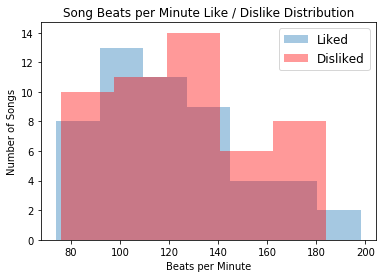

In [199]:
## creates histogram for BPM (split between liked songs and disliked songs)
sns.distplot(pos_bpm, kde=False, label = "Liked")
sns.distplot(neg_bpm, kde=False, label = "Disliked", color="r")
plt.legend(prop={'size':12})
plt.title("Song Beats per Minute Like / Dislike Distribution")
plt.xlabel("Beats per Minute")
plt.ylabel("Number of Songs")
plt.savefig("BPM")

This histogram shows the number of songs that have certain BPM levels. The red represents the number of disliked songs and the blue represents the number of liked songs. The liked songs have more of a positive skew. Both have similar shapes, but their peaks are different. The liked songs peak is at around 100-120, and the disliked songs peak is at around 120-140. On average, the disliked songs have a slightly higher BPM than the liked songs.

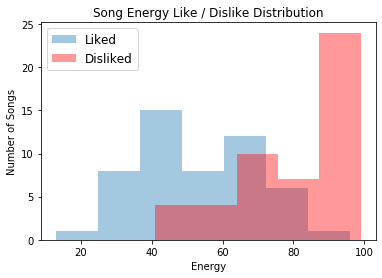

In [200]:
## creates histogram for Energy (split between liked songs and disliked songs)
sns.distplot(pos_energy, kde=False, label = "Liked")
sns.distplot(neg_energy, kde=False, label = "Disliked", color="r")
plt.legend(prop={'size':12})
plt.title("Song Energy Like / Dislike Distribution")
plt.xlabel("Energy")
plt.ylabel("Number of Songs")
plt.savefig("Energy")

This histogram shows the number of songs that have certain Energy levels. The red represents the number of disliked songs and the blue represents the number of liked songs. The disliked songs overall have a much higher energy level than the liked songs.

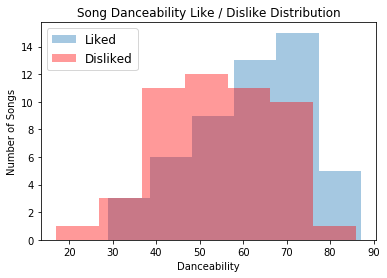

In [201]:
## creates histogram for Danceability (split between liked songs and disliked songs)
sns.distplot(pos_dance, kde=False, label = "Liked")
sns.distplot(neg_dance, kde=False, label = "Disliked", color="r")
plt.legend(prop={'size':12})
plt.title("Song Danceability Like / Dislike Distribution")
plt.xlabel("Danceability")
plt.ylabel("Number of Songs")
plt.savefig("Danceability")

This histogram shows the number of songs that have certain Danceability levels. The red represents the number of disliked songs and the blue represents the number of liked songs. Overall, the liked songs have a higher danceability level than disliked songs.

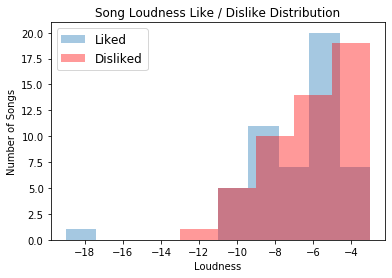

In [202]:
## creates histogram for Loudness (split between liked songs and disliked songs)
sns.distplot(pos_loud, kde=False, label = "Liked")
sns.distplot(neg_loud, kde=False, label = "Disliked", color="r")
plt.legend(prop={'size':12})
plt.title("Song Loudness Like / Dislike Distribution")
plt.xlabel("Loudness")
plt.ylabel("Number of Songs")
plt.savefig("Loudness")

This histogram shows the number of songs that have certain Loudness levels. The red represents the number of disliked songs and the blue represents the number of liked songs. The disliked songs have a pretty linear relationship between loudness and number of songs liked. The liked songs have an outlier at -19 loudness. The shapes of the liked and disliked songs distribution do not have similar shapes, but they are located around the same noise level values. 

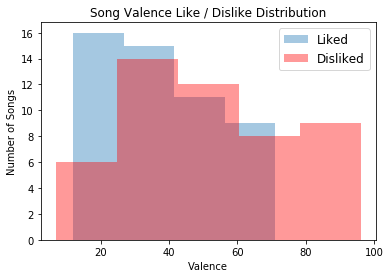

In [203]:
## creates histogram for Valence (split between liked songs and disliked songs)
sns.distplot(pos_valence, kde=False, label = "Liked")
sns.distplot(neg_valence, kde=False, label = "Disliked", color="r")
plt.legend(prop={'size':12})
plt.title("Song Valence Like / Dislike Distribution")
plt.xlabel("Valence")
plt.ylabel("Number of Songs")
plt.savefig("Valence")

This histogram shows the number of songs that have certain Valence levels. The red represents the number of disliked songs and the blue represents the number of liked songs. The disliked songs on average have higher valence levels than the liked songs. 

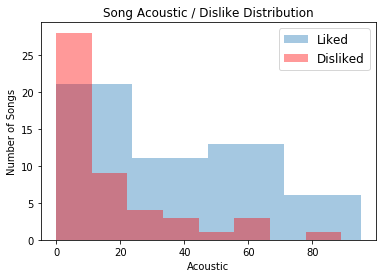

In [204]:
## creates histogram for Acousticness (split between liked songs and disliked songs)
sns.distplot(pos_acoustic, kde=False, label = "Liked")
sns.distplot(neg_acoustic, kde=False, label = "Disliked", color="r")
plt.legend(prop={'size':12})
plt.title("Song Acoustic / Dislike Distribution")
plt.xlabel("Acoustic")
plt.ylabel("Number of Songs")
plt.savefig("Acoustic")

This histogram shows the number of songs that have certain Acoustic levels. The red represents the number of disliked songs and the blue represents the number of liked songs. The liked songs overall have much higher acoustic levels than the disliked songs.

### 3.3. Model Construction

### 3.4. Model Evaluation

In [205]:
## iterates through each classifier and fits the model and computes the accuracy of each model
for classifier in estimators.values():     
    classifier.fit(X=X_train_selected, y=y_train)
    classifier_predicted = classifier.predict(X=X_test_selected)
    classifier_accuracy = classifier.score(X_test_selected, y_test)
    print(list(estimators.keys())[list(estimators.values()).index(classifier)] + ":")
    print("\tPrediction accuracy on the test data:", f"{classifier_accuracy:.2%}\n")


k-Nearest Neighbor:
	Prediction accuracy on the test data: 84.00%

Support Vector Machine:
	Prediction accuracy on the test data: 92.00%

Decision Tree:
	Prediction accuracy on the test data: 52.00%

Random Forest:
	Prediction accuracy on the test data: 92.00%



### 3.5. Model Optimization

In [206]:
## Grid search for SVC (highest accuracy model)
## parameters to be tuned are C, gamma, and kernel
Cs = [0.001, 0.01, 0.1, 1, 10]

gammas = [0.001, 0.01, 0.1, 1]

kernels = ["rbf", "linear"]

param_grid = {'C': Cs, 'gamma' : gammas , 'kernel' : kernels}

grid_search = GridSearchCV(svc_lin, param_grid, cv=5)

grid_search.fit(X=X_train_selected, y=y_train)

print("Best parameters: ", grid_search.best_params_)

print("Training set score with best parameters: ", grid_search.best_score_)

print("Test set score with best parameters: ", grid_search.score(X_test_selected, y_test))

Best parameters:  {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Training set score with best parameters:  0.9066666666666666
Test set score with best parameters:  0.92


/Users/gracebrown/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 3.6. Model Testing

In [207]:
## refits SVC model based on chosen parameters from Grid search, computes accuracy
svc_lin = SVC(kernel="linear", C=0.1, gamma=.001)
svc_lin.fit(X=X_train_selected, y=y_train)
classifier_predicted = svc_lin.predict(X=X_test_selected)
classifier_accuracy = svc_lin.score(X_test_selected, y_test)
print("Prediction accuracy on the test data using SVC:", f"{classifier_accuracy:.2%}\n")

Prediction accuracy on the test data using SVC: 92.00%



In [208]:
## uses trained model to make song like predictions on our df_new_music
pred = svc_lin.predict(df_new_music.drop("Artist", axis = 1).drop("Title", axis = 1).drop("Acoustic", axis=1)
                     .drop("BPM", axis=1).drop("Dance", axis=1))
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [209]:
## adds column to df_new_music with the like predictions
df_new_music['Recommendations'] = pred
df_new_music

,Title,Artist,BPM,Energy,Dance,Loud,Valence,Acoustic,Recommendations
0,My Oh My (feat. DaBaby),Camila Cabello,105,49,72,-6,38,2,1
1,Adore You,Harry Styles,99,77,68,-4,57,2,1
2,The Box,Roddy Ricch,117,59,90,-7,64,10,1
3,PAID MY DUES,NF,146,78,81,-4,38,14,1
4,Family,The Chainsmokers,118,61,58,-7,37,43,1
...,...,...,...,...,...,...,...,...,...
94,still ain't you (feat. Nea),Steve James,122,55,76,-10,51,0,1
95,Typa Luv,D. Muñoz,96,49,65,-7,25,54,1
96,PSYKENIGHT,Lancey Foux,140,85,80,-10,65,5,0
97,How I'm Leaving,Westside Tut,150,53,69,-10,34,12,1


In [210]:
## takes out all songs from df_new_music not recommended (val of 0)
for index, row in df_new_music.iterrows():
    if row['Recommendations'] == 0:
        df_new_music = df_new_music.drop([index])
df_new_music

,Title,Artist,BPM,Energy,Dance,Loud,Valence,Acoustic,Recommendations
0,My Oh My (feat. DaBaby),Camila Cabello,105,49,72,-6,38,2,1
1,Adore You,Harry Styles,99,77,68,-4,57,2,1
2,The Box,Roddy Ricch,117,59,90,-7,64,10,1
3,PAID MY DUES,NF,146,78,81,-4,38,14,1
4,Family,The Chainsmokers,118,61,58,-7,37,43,1
...,...,...,...,...,...,...,...,...,...
92,Say It Now,Nick Wilson,132,43,63,-11,27,44,1
93,Too Much To H8,Paige,82,36,81,-9,39,77,1
94,still ain't you (feat. Nea),Steve James,122,55,76,-10,51,0,1
95,Typa Luv,D. Muñoz,96,49,65,-7,25,54,1


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

We compared 4 different machine learning classifiers: Support Vector Machine, k-Nearest Neighbors, Decision Trees, and Random Forest. The algorithm that revealed the best performance was the Support Vector Classifier, at 92% prediction accuracy, Random Forest also shows good performance, however the prediction accuracy fluctuates because each time it is run, a different set of Decision Trees is compared. However, the prediction accuracy stays between 84% and 96%. The prediction accuracy score represents the percentage of songs that were correctly guessed to be liked or disliked by the user, and it is run on the testing data after the model has been trained by the training data. The algorithm that we are using for our predictive model is the Support Vector Classifier because it showed the most consistenly highest prediction accuracy, at 92%. After this, we used Grid Search on the Support Vector Classifier in order to hyperparameter tune, and to find the optimal model architecture, and to avoid overfitting. Finally, after running Grid Search, we found that the most optimal parameters to use were C = 0.1, and gamma = 0.001, and kernel = "linear". Afterwards, we re-fit the SVC Model using those parameters, and received a prediction accuracy of 92% on the testing data. 
Furthermore, we inputted our New Music Data into our newly fitted model, and then filtered the songs in the New Music Dataframe by whether or not the model recommended the song to the user or not. This means that we filtered all of the songs for a target value of 1, meaning the model predicted that the user would like the song. This gave us 69 songs the model recommended to Caterina based off of the songs she liked and disliked. 
    
In the future, we could improve this project by obtaining more data. The dataset we had only contained 50 liked songs and 50 disliked songs, and not all songs were from different genres across the board. Having more data would of course give our model more information to learn from, but also having likes and dislikes from a wider variety of genres of music would allow the model to generalize better to any set of songs you give the model. Also, this project could benefit from using more sophisticated machine learning algorithms, such as neural networks. Since they are more complicated, this may yield more accurate results.


<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">